## MTH9893 Time Series Analysis HW5
* Group 01
* Author: Pan, Hongchao & Sun, Yu
* Kernel version: **R 3.3.2**
* **Packages: **
* Data: 
* Notes: 

In [1]:
# Install required libraries
# Notes: If cannot install package by using function bellow, try 'conda install gcc' first.
# The reason may be caused by gcc complier

#install.packages("dlm")
#install.packages("readxl")

In [45]:
# Load libraries
library(readxl)
library(repr)
library(dlm)

In [3]:
# Read the data from excel file
# Adjusted close price of SPX and AAPL: 
# Cash Adjustment Normal, Cash Adjustment Abnormal, Capital Changes
# Reference: https://cran.r-project.org/web/packages/readxl/readxl.pdf
df<- read_excel("HW5_Data.xlsx",sheet = 1,col_names = TRUE, skip = 1)
colnames(df)<- c('Date','AAPL_Adj_Close','Date','SPX_Adj_Close')
# Remove redundency date
vars<- c('Date','AAPL_Adj_Close','SPX_Adj_Close')
df_llm<- df[vars]
head(df_llm)

Date,AAPL_Adj_Close,SPX_Adj_Close
2012-03-12,71.5169,1371.09
2012-03-13,73.6028,1395.95
2012-03-14,76.3857,1394.28
2012-03-15,75.8649,1402.60
2012-03-16,75.8662,1404.17
2012-03-19,77.8782,1409.75


Table 1. Overview of AAPL and SPX adjust close price

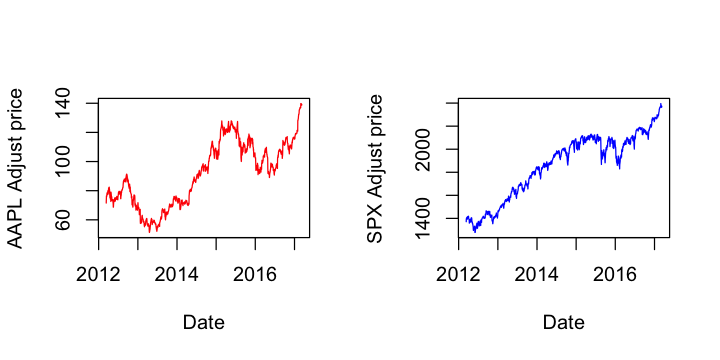

In [4]:
# Plot the data of AAPL and SPX adjust close price
options(repr.plot.height=3, repr.plot.width=6)
par(mfrow = c(1,2))
plot(x=df_llm[,'Date'],y=df_llm[,'AAPL_Adj_Close'],type='l',
    xlab='Date',ylab='AAPL Adjust price',col='red')
plot(x=df_llm[,'Date'],y=df_llm[,'SPX_Adj_Close'],type='l',
    xlab='Date',ylab='SPX Adjust price',col='blue')

Figure 1. Plot of AAPL and SPX adjust close price: no outliers, data is ready for analysis

In [5]:
# Get the returns of AAPL and SPX
AAPL_change<- diff(df_llm[,'AAPL_Adj_Close'],differences = 1)/df_llm[(1:(length(df_llm[,'Date'])-1)),'AAPL_Adj_Close']
SPX_change<- diff(df_llm[,'SPX_Adj_Close'],differences = 1)/df_llm[(1:(length(df_llm[,'Date'])-1)),'SPX_Adj_Close']
df_returns<- data.frame(df_llm[(2:length(df_llm[,'Date'])),'Date'],AAPL_change,SPX_change)
colnames(df_returns)<- c('Date','AAPL_%change','SPX_%change')
head(df_returns)

Date,AAPL_%change,SPX_%change
2012-03-13,2.916653e-02,0.018131560
2012-03-14,3.780970e-02,-0.001196318
2012-03-15,-6.818030e-03,0.005967238
2012-03-16,1.713572e-05,0.001119350
2012-03-19,2.652037e-02,0.003973878
2012-03-20,8.085703e-03,-0.003000532


Table 2. Overview of AAPL and SPX percentage changes

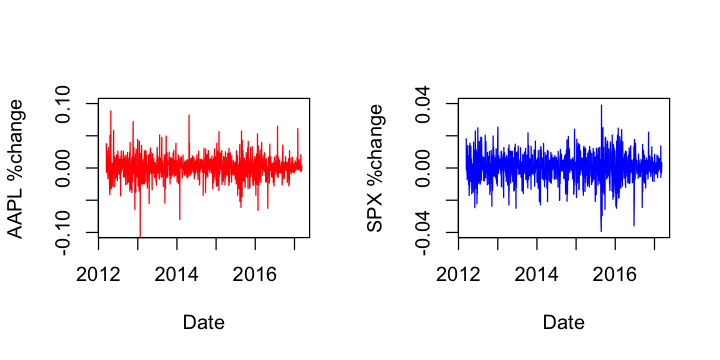

In [6]:
# Plot the data of % change returns
options(repr.plot.height=3, repr.plot.width=6)
par(mfrow = c(1,2))
plot(x=df_returns[,'Date'],y=df_returns[,'AAPL_%change'],type='l',
    xlab='Date',ylab='AAPL %change',col='red',ylim=c(-0.10,0.10))
plot(x=df_returns[,'Date'],y=df_returns[,'SPX_%change'],type='l',
    xlab='Date',ylab='SPX %change',col='blue',ylim=c(-0.04,0.04))

Figure 2. The percentage change daily returns of AAPL and SPX

* Note: The percentage change shows as decimal not %, e.g. 0.01, not 0.01%

In [7]:
# Assign the daily return of AAPL as rt, and daily return of SPX as mt
date<- df_returns[,'Date']
rt<- df_returns[,'AAPL_%change']
mt<- df_returns[,'SPX_%change']

In [8]:
# Compute alpha_t and beta_t based on regression
alpha_t<- c()
beta_t<- c()
for (i in 1:(length(rt)-63)){
    # The rolling window contains 63 days (3M)
    res<- lm(rt[i:(i+63)]~mt[i:(i+63)])
    alpha_t<- c(alpha_t, as.numeric(res$coeff[1]))
    beta_t<- c(beta_t,as.numeric(res$coeff[2]))
}

In [9]:
# Get Xt and Yt
Xt<- alpha_t
Yt<- rt[1:length(beta_t)]-(beta_t*mt[1:length(beta_t)])

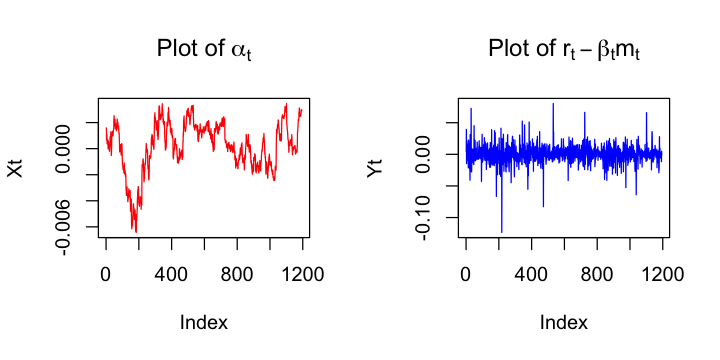

In [10]:
# Plot the data of Xt and Yt
options(repr.plot.height=3, repr.plot.width=6)
par(mfrow = c(1,2))
plot(Xt, type='l',col='red',main=expression(paste("Plot of ",alpha['t'])))
plot(Yt,type='l',col='blue',main=expression(paste("Plot of ",r['t']-beta['t']*'m'['t'])))

Figure 3. Plot of $\alpha_t$ and $r_t-\beta_tm_t$

**Formula the local leverl model with $X_t=\alpha_t$, $Y_t=r_t-\beta_tm_t$**

* Compute the variance of $\epsilon_t$ and $u_t$ from local level model

* Used dlmModReg() function from dlm package to set up CAPM model

* Used dlmMLE() function ftom dlm package to estimate the parameters

* Reference: <sup id="cite_ref-QT_CAPM" class="reference"><a href="#cite_note-QT_CAPM"><span>[</span>1<span>]</span></a></sup> <sup id="cite_ref-SSM" class="reference"><a href="#cite_note-SSM"><span>[</span>2<span>]</span></a></sup> <sup id="cite_ref-SSMinR" class="reference"><a href="#cite_note-SSMinR"><span>[</span>3<span>]</span></a></sup> </sup> <sup id="cite_ref-SSMP" class="reference"><a href="#cite_note-SSMP"><span>[</span>4<span>]</span></a></sup>

dlmModPoly with order 1 will generate a local level model as following </sup> <sup id="cite_ref-SSMP" class="reference"><a href="#cite_note-SSMP"><span>[</span>4<span>]</span></a></sup>:

$$
y_t=\theta_t+v_t \\
\theta_t=\theta_{t-1}+w_t
$$

If we consider $\theta_t$ as $X_t$, $y_t$ as $Y_t$, $v_t$ as $u_t$, and $w_t$ as $\epsilon_t$, then we will have the exact local level model given in the homework. 

Another way to set up the local level model is using dlmModReg() function from scratch of CAPM model</sup> <sup id="cite_ref-SSMP" class="reference"><a href="#cite_note-SSMP"><span>[</span>4<span>]</span></a></sup>.

<img src="TVP_CAPM.png" style="float:center; height: 250px">


**Here, we chose dlmModReg to implement the local level model as following:**

In [11]:
# Compute the variance of sigma and sigma_a and sigma_b from observed data
eXt<- Xt[2:length(Xt)]-Xt[1:(length(Xt)-1)]
ut<- Yt-Xt
ebt<- beta_t[2:length(beta_t)]-beta_t[1:(length(beta_t)-1)]
var_sigma<- var(ut)  # variance of ut
var_alpha<- var(eXt)  # variance of et in alpha_t
var_beta<- var(ebt) # variance of wt in beta_t

paste('Variance of', '$\\sigma^2$,','$\\sigma^2_{\\alpha}$', ' and ','$\\sigma^2_{\\beta}$' , 'from observed data are: ',
    var_sigma, ",", var_alpha,',',var_beta,', respectively.', 
      ' The variances will be the parameters (initial values) of State Space Model MLE estimator.')

[1] "Variance of $\\sigma^2$, $\\sigma^2_{\\alpha}$  and  $\\sigma^2_{\\beta}$ from observed data are:  0.000194080534774814 , 9.84271704956119e-08 , 0.00173687751380074 , respectively.  The variances will be the parameters (initial values) of State Space Model MLE estimator."

In [12]:
# Ref: http://hedibert.org/wp-content/uploads/2015/03/EconometriaAvancada-aula7.pdf P27-P33 of example SPX and IBM
# set parameter restrictions 
#parm_rest <- function(parm){
#    return( exp(parm) ) 
#}
# set up SS model, local level model here
#options(warn = -1) # Ignore the warnings, change value to 0 if wants to show the warning message
ssm <- function(parm,x.mat){
#    parm <- exp(parm)
    return( dlmModReg(X=x.mat, dV=parm[1],dW=c(parm[2],parm[3])) )  
    # dV: variance of the observation noise.
}
# estimate parameters
ssmMLE <- dlmMLE(y=rt,parm=c(var_sigma,var_alpha,var_beta),x.mat=mt,build=ssm,hessian=T)
# c(): pass the observed variances to be the initial value of dV and dW
# Check convergence
cat('The value of MLE convergence: ',ssmMLE$convergence,'\n')
cat('The message of MLE estimator: ',ssmMLE$message)

The value of MLE convergence:  0 
The message of MLE estimator:  CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH

**The value and message shows the MLE was convergent. Thus we can build the model use the parameters from MLE estimator.**

In [13]:
# get residual variance estimate
se2 <- exp(ssmMLE$par)
paste('Variance of', '$\\sigma^2$,','$\\sigma^2_{\\alpha}$', ' and ','$\\sigma^2_{\\beta}$' , 
      'from MLE estimator are: ', se2[1],',',se2[2],',',se2[3])

[1] "Variance of $\\sigma^2$, $\\sigma^2_{\\alpha}$  and  $\\sigma^2_{\\beta}$ from MLE estimator are:  1.00019210324958 , 1.00000009768917 , 1.00173837340426"

In [14]:
# Build the local level model
llm<- ssm(ssmMLE$par,mt)  # Build the model with mt, corresponding x.mat in ssm() function

In [15]:
# Get the Kalman filter value
llmFilter<- dlmFilter(rt,llm) # Filter the value based on rt
# Get the smoothed value
llmSmooth<- dlmSmooth(rt,llm) # Smooth the value based on rt

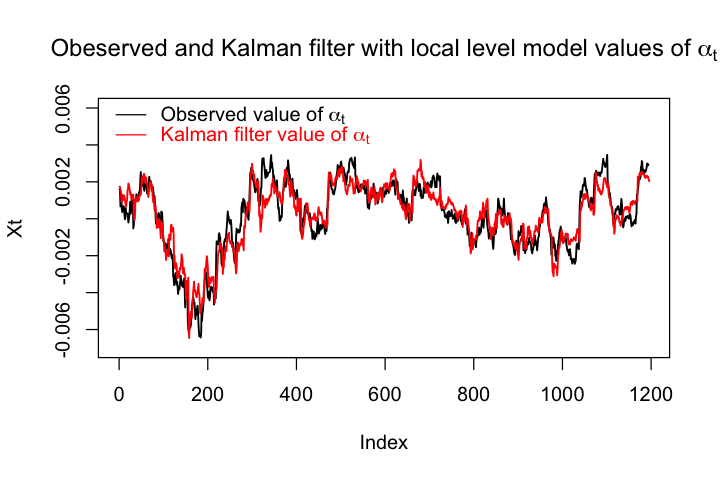

In [25]:
#Plot the Kalman filter value of alpha_t and observed alpha_t
options(repr.plot.height=4, repr.plot.width=6)
plot(Xt,type='l',col='black',lwd = 1.5,ylim = c(-0.007,0.006))
# Notes: 1st column of llmFilter$m is intercept alpha_t, 2nd column is slope beta_t 
# llmFilter$m[63:(length(llmFilter$m[,1])),1] is Kalman filter value of alphat
lines(llmFilter$m[63:(length(llmFilter$m[,1])),1],lty=1,col='red',lwd=1.5)
legend('topleft',c(expression(paste("Observed value of ",alpha['t'])),
                      expression(paste("Kalman filter value of ",alpha['t']))),
      lty=c(1,1),col=c('black','red'),y.intersp=2,
       text.col=c('black','red'),cex=1, inset=0.005,box.col='white')
title(expression(paste("Obeserved and Kalman filter with local level model values of "
                       ,alpha['t'])))

Figure 4. Observed value VS Kalman filter value of $\alpha_t$

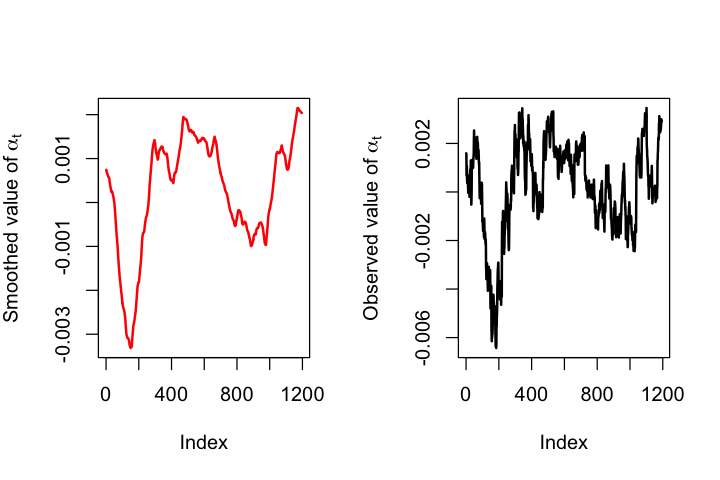

In [17]:
# Plot the smoothed and observed value of alpha_t
options(repr.plot.height=4, repr.plot.width=6)
par(mfrow = c(1,2))
plot(llmSmooth$s[63:(length(llmFilter$m[,1])),1],type='l',lwd=2,
     ylab=expression(paste("Smoothed value of ",alpha['t'])),col='red')
# Similar as alpha_t in Kalman filter, 1st column of llmSmooth$s is smoothed alpha_t
# 2nd column of llmSmooth$s is smoothed beta_t
plot(Xt,type='l',ylab=expression(paste("Observed value of ",alpha['t'])),lwd=2)

Figure 5. Plot of smoothed value (left) and observed value (right) of $\alpha_t$

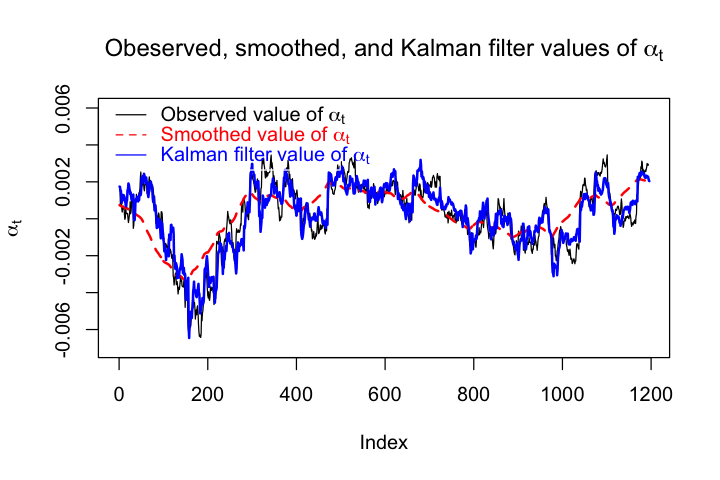

In [33]:
# Plot the smoothed obsered value of alpha_t in one figure
options(repr.plot.height=4, repr.plot.width=6)
plot(Xt,type='l',lwd=1,,ylim = c(-0.007,0.006),ylab=expression(paste(alpha['t'])))
lines(llmSmooth$s[63:(length(llmFilter$m[,1])),1],lty=2,lwd=2,col='red')
lines(llmFilter$m[63:(length(llmFilter$m[,1])),1],lty=1,col='blue',lwd=2)
legend('topleft',c(expression(paste("Observed value of ",alpha['t'])),
                      expression(paste("Smoothed value of ",alpha['t'])),
                  expression(paste("Kalman filter value of ",alpha['t']))),
      lty=c(1,2,1),col=c('black','red','blue'),y.intersp=2,
       text.col=c('black','red','blue'),cex=1, inset=0.005,box.col='white')
title(expression(paste("Obeserved, smoothed, and Kalman filter values of ",alpha['t'])))


Figure 6. Plot of observed values, smoothed values, and Kalman filter values of $\alpha_t$

In [43]:
# Forecast the data in next 10 steps
llmForest<- dlmForecast(llmFilter,nAhead = 10,method = 'plain')
llmForest

ERROR: Error in dlmForecast(llmFilter, nAhead = 10, method = "plain"): dlmForecast only works with constant models


In [35]:
?dlmForecast

### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>


    <li id="cite_note-QT_CAPM"><span class="mw-cite-backlink"><b><a href="#cite_ref-QT_CAPM">^</a></b></span> Linear State Space Linear Models, and Kalman Filters, 
<span>* Quantitative Thoughts*</span>, http://lalas.github.io/quantitativeThoughts/r/2014/09/01/dlmTutorial.html#topic6.1.</li>

  <li id="cite_note-SSM"><span class="mw-cite-backlink"><b><a href="#cite_ref-SSM">^</a></b></span>   https://sites.ualberta.ca/~sfossati/e509/files/other/dlm_ex.R <span></li>
  
  
    <li id="cite_note-SSMinR"><span class="mw-cite-backlink"><b><a href="#cite_ref-SSMinR">^</a></b></span>   State Space Model in R,
<span>* Journal of Statistical Software*</span>,  <span>**41**</span> 1-25 (2011). <span>https://www.jstatsoft.org/article/view/v041i04/v41i04.pdf</span></li>

    <li id="cite_note-SSMP"><span class="mw-cite-backlink"><b><a href="#cite_ref-SSMP">^</a></b></span> http://hedibert.org/wp-content/uploads/2015/03/EconometriaAvancada-aula7.pdf, <span>*Hedibert Freitas Lopes*, </span> <span>22-30</span> </li>
 
       
</ol>